In [1]:
from datasets import CSSDataset
import matplotlib.pyplot as plt
!pip install nltk
!pip install googletrans
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /mnt/ai_filestore/home/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /mnt/ai_filestore/home/nick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [45]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [9]:
import os
os.listdir("../data")

['MITStates', 'CSSDataset']

In [13]:
dataset = CSSDataset("../data/CSSDataset/CSS-vn-vanilla-v2.json")



In [12]:
import os
os.listdir("../data/CSSDataset")

['data.npy',
 'scenes',
 'CSS-vn-vanilla.json',
 'css_dataset_small.json',
 'images',
 'css_toy_dataset_novel2_small.dup.npy',
 'css.zip',
 'CSS-vn.json',
 'CSS-vn-vanilla-v2.json']

In [14]:
gen_mod = dataset.generate_random_query_target()["mod"]["str"]

from googletrans import Translator
translator = Translator(service_urls=['translate.google.com.vn'])
translations = translator.translate([gen_mod],dest="vi")
for tran in translations:
    print(tran.origin, tran.text)

AttributeError: 'NoneType' object has no attribute 'group'

In [49]:
gen_mod

'add large purple object to middle-right'

In [50]:
word_count("what the what fuck")

{'what': 2, 'the': 1, 'fuck': 1}

In [21]:
full_str = ""
full_dataset = dataset.data["train"]["mods"] + dataset.data["test"]["mods"]
for mod in full_dataset:
    full_str +=  (" " + mod["to_str"]) 

In [22]:
word_count(full_str)

NameError: name 'word_count' is not defined

In [32]:
type_to_words_map = {
    "VB":["make","add","remove"],
#     "<VB_add>":["add"],
#     "<VB_remove>":["remove"],
    "PP":["to"],
    "JJ":["small","large","green","blue","brown","gray","purple","cyan","red","yellow"],
    "NN":["circle","rectangle","triangle","object"],
    "JJ_pos":["middle-left",'middle-right','middle-center','bottom-center','bottom-left','bottom-right','top-right','top-left','top-center']
}

def sentence_format(sentence, type_to_words_map):
    words = set(sentence.split(" "))            
    sentence_list = sentence.split(" ")

    for word in words:
        for vocab_type, list_vocabs in type_to_words_map.items():
            if word in list_vocabs:
                while word in sentence_list:
                    sentence_list[sentence_list.index(word)] = vocab_type 
                
    fmt_sentence = " ".join(sentence_list)
    return fmt_sentence

sentence_formats = {}
sentences = []
demo_sentences = []

for mod in full_dataset:
    sentence = mod["to_str"]
    sentences.append(sentence)
    formatted_sentence = sentence_format(sentence,type_to_words_map)

    sentence_formats[formatted_sentence] = sentence 
    
    


In [24]:
grammar_str = ""

# Create grammar by vocab-only
for word_type, words in type_to_words_map.items():
    for word in words:
        grammar_str += f"{word_type} -> {word}\n"
    
print(grammar_str)    

VB -> make
VB -> add
VB -> remove
PP -> to
JJ -> small
JJ -> large
JJ -> green
JJ -> blue
JJ -> brown
JJ -> gray
JJ -> purple
JJ -> cyan
JJ -> red
JJ -> yellow
NN -> circle
NN -> rectangle
NN -> triangle
NN -> object
JJ_pos -> middle-left
JJ_pos -> middle-right
JJ_pos -> middle-center
JJ_pos -> bottom-center
JJ_pos -> bottom-left
JJ_pos -> bottom-right
JJ_pos -> top-right
JJ_pos -> top-left
JJ_pos -> top-center



In [20]:
def move_word_in_grammar(grammar, word_to_move, word_dest_after):
    grammar = grammar.split(" ")
    
    grammar.insert(grammar.index(grammar.index(word_dest_after), grammar.pop(grammar.index(word_to_move))))
    
    return " ".join(grammar)

def rule_based_en_to_vi_grammar(en_grammars):
    pass
    
    

In [56]:
print("hello")

hello


# Dịch

In [57]:
from urbamt import Translator
from tqdm import tqdm

In [58]:
Translator

urbamt.translator.Translator

In [17]:
sentence_formats

NameError: name 'sentence_formats' is not defined

In [1]:
from urbamt import Translator 

src_grammar = """
            S -> VP | VP
            NP -> JJ NP 
            NP -> NN
            VP -> VB NP
            VP -> VP JJ 
            VP -> VB
            VP -> VP PP JJ 
            VB -> 'make' | 'add' | 'remove'
            PP -> 'to'
            JJ -> 'small' | 'large'
            NN -> 'circle' | 'rectangle' | 'triangle' | 'object'
            JJ -> 'green' | 'blue' | 'brown' | 'gray' | 'purple' | 'cyan' | 'red' | 'yellow'
            JJ -> 'middle-left' | 'middle-right' | 'middle-center' | 'bottom-center' | 'bottom-left' | 'bottom-right' | 'top-right' | 'top-left' | 'top-center'
            """

en_to_vi_dictionary = {
            "object":"khối",
            "circle":"khối cầu",
            "triangle":"khối trụ",
            "rectangle":"khối hộp chữ nhật",
            "make": "biến",
            "add":"thêm", 
            "remove":"xóa",
            "brown":"màu nâu",
            "green":"màu xanh lá",
            "blue":"màu xanh dương",
            "gray":"màu xám",
            "purple":"màu tím",
            "cyan":"màu lam",
            "red":"màu đỏ",
            "yellow":"màu vàng",
            "middle-left":"bên trái",
            "middle-right":"bên phải",
            "middle-center":"trung tâm",
            "bottom-center":"chính giữa phía dưới",
            "bottom-left":"góc trái phía dưới",
            "bottom-right":"góc phải phía dưới",
            "top-right": "góc phải phía trên",
            "top-left": "góc trái phía trên",
            "top-center": "chính giữa phía trên",
            "small":"nhỏ",
            "large":"lớn",
            "to":"vào"
}
                          
#en_to_vi_grammar = {}#{"NP1 -> JJ_color NP": "NP1 -> NP JJ_color"}
en_to_vi_grammar = {"NP -> JJ NP":"NP -> NP JJ",
                    "VP -> VP JJ":"VP -> VP thành JJ"}

translator = Translator(src_grammar = src_grammar,
                        src_to_tgt_grammar = en_to_vi_grammar,

                        src_to_tgt_dictionary = en_to_vi_dictionary)

In [33]:
sentences = ["make bottom-left gray circle blue",
             "make top-left rectangle blue",
             "make brown circle red",
             "remove red circle",
             "add red triangle to bottom-left",
             "make triangle yellow",
             "remove middle-right circle",
             "remove middle-center gray triangle",
             "add triangle to top-center",
             "remove circle",
             "remove large blue triangle",
             "make small red circle yellow",
             "remove middle-left small cyan rectangle",
             "make top-center large gray object green",
             "add large blue circle to middle-right"]

trans_dict = []
translator.translate(sentences)

['biến khối cầu màu xám góc trái phía dưới thành màu xanh dương',
 'biến khối hộp chữ nhật góc trái phía trên thành màu xanh dương',
 'biến khối cầu màu nâu thành màu đỏ',
 'xóa khối cầu màu đỏ',
 'thêm khối trụ màu đỏ vào góc trái phía dưới',
 'biến khối trụ thành màu vàng',
 'xóa khối cầu bên phải',
 'xóa khối trụ màu xám trung tâm',
 'thêm khối trụ vào chính giữa phía trên',
 'xóa khối cầu',
 'xóa khối trụ màu xanh dương lớn',
 'biến khối cầu màu đỏ nhỏ thành màu vàng',
 'xóa khối hộp chữ nhật màu lam nhỏ bên trái',
 'biến khối màu xám lớn chính giữa phía trên thành màu xanh lá',
 'thêm khối cầu màu xanh dương lớn vào bên phải']

In [2]:
!pip install urbamt

     |████████████████████████████████| 1.4 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 406 kB/s  eta 0:00:01
     |████████████████████████████████| 301 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 723 kB 23.8 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=60c1e9e9fc37356655eeda8336f0576795828bfde111fc48868cd68d943c18d7
  Stored in directory: /mnt/ai_filestore/home/nick/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk


In [16]:
from tqdm import tqdm

for mode in ["train","test"]:
    for idx, mod in tqdm(enumerate(dataset.data[mode]["mods"])):
        txt = mod["to_str"]
        dataset.data[mode]["mods"][idx]["to_str"] = translator.translate(txt)[0]

0it [00:00, ?it/s]


ValueError: Grammar does not cover some of the input words: "'biến', 'khối', 'cầu', 'lớn', 'bên', 'trái', 'thành', 'màu', 'xanh', 'lá'".

biến khối trụ thành màu lam


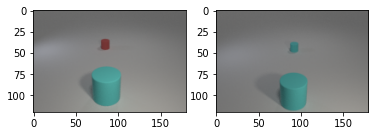

In [62]:
gen_mod = dataset.generate_random_query_target()
gen_src_img = gen_mod["source_img_data"]
gen_tgt_img = gen_mod["target_img_data"]
mod_str = gen_mod["mod"]["str"]
plt.subplot(1,2,1)
plt.imshow(gen_src_img)
plt.subplot(1,2,2)
plt.imshow(gen_tgt_img)
print(mod_str)

In [63]:
import json
import numpy as np

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)
        
with open("../data/CSSDataset/CSS-vn-vanilla-v2.json","w") as f:
    json.dump(dataset.data,f, cls=NpEncoder)

# Generate English Data

In [11]:
dataset = CSSDataset("../data/CSSDataset/CSS-vn-vanilla-v2.json")

NameError: name 'CSSDataset' is not defined

In [24]:
import json
import numpy as np

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)
        
datapath = "../data/CSSDataset/css_toy_dataset_novel2_small_dup.npy"
eng_dict = np.load(datapath, allow_pickle=True, encoding="latin1").item()
        
with open("../data/CSSDataset/CSS-eng.json","w") as f:
    json.dump(eng_dict, f, cls=NpEncoder)

In [25]:
import json
with open("../data/CSSDataset/CSS-eng.json") as f:
    data = json.load(f)

In [26]:
data

{'test': {'labels': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,
   1

# Generate augmented CSS-Vn